In [8]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


First few rows of the dataset:
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📊 5-Fold Cross-Validation F1 Score: 0.2897


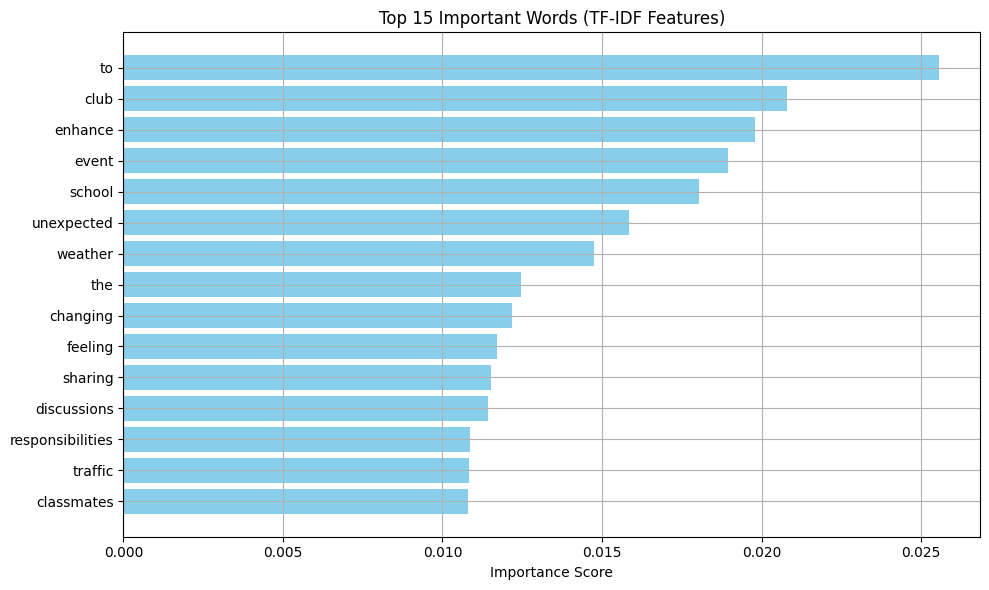

In [10]:
# Step 1: Load and preview the dataset
df = pd.read_csv('/mnt/3) Sentiment dataset.csv')
print("\nFirst few rows of the dataset:")
print(df.head())

# Step 2: Clean column names
df.columns = df.columns.str.strip().str.lower()

# Step 3: Clean and simplify sentiment labels
df['sentiment'] = df['sentiment'].str.lower().str.strip()
df['sentiment'] = df['sentiment'].replace({
    'happy': 'positive', 'joy': 'positive', 'great': 'positive',
    'sad': 'negative', 'angry': 'negative', 'terrible': 'negative',
    'neutral': 'neutral'
})

# Optional: Limit to only 3 clean classes
df = df[df['sentiment'].isin(['positive', 'negative', 'neutral'])]

# Step 4: Drop missing/empty text rows
df = df.dropna(subset=['text', 'sentiment'])
df = df[df['text'].str.strip() != ""]

# Step 5: Encode target labels
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])  # Do this only after cleaning

# Step 6: Convert text to TF-IDF features
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['text'])

# Step 7: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 8: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Step 9: Evaluate on test set
y_pred = rf.predict(X_test)

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 10: Cross-validation F1 score
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='f1_macro')
print(f"\n📊 5-Fold Cross-Validation F1 Score: {np.mean(cv_scores):.4f}")

# Step 11: Feature Importance from Random Forest
importances = rf.feature_importances_
feature_names = tfidf.get_feature_names_out()

# Top 15 important words
top_indices = np.argsort(importances)[::-1][:15]
top_words = [feature_names[i] for i in top_indices]
top_scores = importances[top_indices]

# Step 12: Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_words[::-1], top_scores[::-1], color='skyblue')
plt.xlabel("Importance Score")
plt.title("Top 15 Important Words (TF-IDF Features)")
plt.grid(True)
plt.tight_layout()
plt.show()
